# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  The Movie Database (TMDb) is database for  about 10,000 movies with different types of movies from 1960 until 2015. the data frame consist of actors to movies ,type of movie, director , budgets , revenue , year of release the movie and other information related to movies.   

### Questions:
1. In which year there are the highest numbers of movies? 
2. Which genres are most popular from year to year?
3. Did the rate of production of different types of movies increase over the years?
4. What kinds of properties are associated with movies that have high revenues?
5. Which movies had high revenues over years?
6. Which movies had high budgets over years?
7. What were the budgets and revenue for movies in each year?
8. What is the relation between the number of movies and revenue in each year? 
9. What is the relation between the budgets of movies and revenue in each year?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
TMDb_df = pd.read_csv('tmdb-movies.csv')
TMDb_df.head(2)

FileNotFoundError: [Errno 2] File tmdb-movies.csv does not exist: 'tmdb-movies.csv'

In [3]:
TMDb_df.shape

(10866, 21)

In [4]:
TMDb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

In [5]:
# sum the duplicated rows
TMDb_df.duplicated().sum()

1

In [6]:
# drop the duplication and check again 
TMDb_df.drop_duplicates(inplace =True)
TMDb_df.duplicated().sum()

0

In [7]:
TMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [8]:
# drop not important columns to our analysis 
TMDb_df = TMDb_df.drop(['keywords', 'tagline','release_date','homepage','imdb_id','overview','production_companies'], axis = 1)

In [9]:
TMDb_df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [10]:
# depleting null values from only impotrant columns cast , genres and directors and check again null values
TMDb_df = TMDb_df.dropna(subset=['cast', 'genres','director'])
TMDb_df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### We can see now that there is no nan values in all columns

In [11]:
TMDb_df.shape

(10731, 14)

#### The data has more than one actor in some rows and also more than one genre in one row which separated by | , so we need to separate each actor or genre in one row.

In [12]:
# showing the cast with pip | in separate rows in the database to each one 
# using id column to separate cast with same id but give each actor in separate row

df_cast = pd.DataFrame(TMDb_df.cast.str.split('|').tolist(), index=TMDb_df.id).stack()

df_cast = df_cast.reset_index()[[0, 'id']] 
df_cast.columns = ['cast', 'id']
df_cast.head(4)

,cast,id
0,Chris Pratt,135397
1,Bryce Dallas Howard,135397
2,Irrfan Khan,135397
3,Vincent D'Onofrio,135397


In [13]:
# separating the genres in separate row in the database ( applying the same startegy of cast coliumn in genres column )

df_genr = pd.DataFrame(TMDb_df.genres.str.split('|').tolist(), index=TMDb_df.id).stack()

df_genr = df_genr.reset_index()[[0, 'id']] 
df_genr.columns = ['genres', 'id']
df_genr.head(4)

,genres,id
0,Action,135397
1,Adventure,135397
2,Science Fiction,135397
3,Thriller,135397


In [14]:
# merging the two columns cast and genres by the id of movie
merg_cast_genr = pd.merge(df_genr,df_cast,'outer') 
merg_cast_genr.head(10)

,genres,id,cast
0,Action,135397,Chris Pratt
1,Action,135397,Bryce Dallas Howard
2,Action,135397,Irrfan Khan
3,Action,135397,Vincent D'Onofrio
4,Action,135397,Nick Robinson
5,Adventure,135397,Chris Pratt
6,Adventure,135397,Bryce Dallas Howard
7,Adventure,135397,Irrfan Khan
8,Adventure,135397,Vincent D'Onofrio
9,Adventure,135397,Nick Robinson


In [15]:
# deleting the cast and genres columns from the original datset and add the new columns with separaion 
df_wout_gen_cas= TMDb_df.drop(['cast','genres'],1)
df_wout_gen_cas.shape

(10731, 12)

In [16]:
# merging the new dataframe for cast and genres and id with original data 
mod_df = pd.merge(df_wout_gen_cas,merg_cast_genr,'outer') 
mod_df = pd.merge(df_wout_gen_cas,merg_cast_genr,'outer') 
mod_df.shape

(131311, 14)

In [17]:
mod_df.head(7)

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,cast
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Bryce Dallas Howard
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Irrfan Khan
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Vincent D'Onofrio
4,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Nick Robinson
5,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Chris Pratt
6,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Bryce Dallas Howard


<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1: In which year there are the highest numbers of movies? 

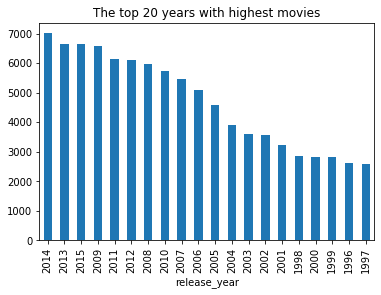

In [18]:
no_mov = mod_df.groupby(['release_year'])['release_year'].count()
no_mov.sort_values(ascending = False)[0:20].plot(kind= 'bar',title = 'The top 20 years with highest movies')

#### we notice that the highest numbers of movies was in 2014 then 2013 then 2015 

### Research Question 2  (Which genres are most popular from year to year?)

In [19]:
# counting different types of movies in each year
mov_year = mod_df.groupby(['release_year','genres'])['genres'].count()
mov_year.head(21)

release_year  genres         
1960          Action             40
              Adventure          25
              Comedy             40
              Crime              10
              Drama              65
              Family             15
              Fantasy            10
              Foreign             5
              History            25
              Horror             35
              Music               5
              Romance            30
              Science Fiction    15
              Thriller           30
              War                10
              Western            30
1961          Action             35
              Adventure          30
              Animation           5
              Comedy             50
              Crime              10
Name: genres, dtype: int64

In [43]:
# the order of movies and highest one in each year
mov_year.sort_values(ascending = False )[0:13]

release_year  genres
2014          Drama     1398
2015          Drama     1274
2013          Drama     1252
2008          Drama     1144
2012          Drama     1134
2009          Drama     1096
2011          Drama     1043
2010          Drama     1019
2006          Drama      977
2007          Drama      975
2009          Comedy     957
2005          Drama      898
2014          Comedy     885
Name: genres, dtype: int64

### we can see that Drama movies on the top of movies in our data in years 2015,2013,2012,2011,2010,2008 while comedy movies were on the top of movies in 2014 and 2009

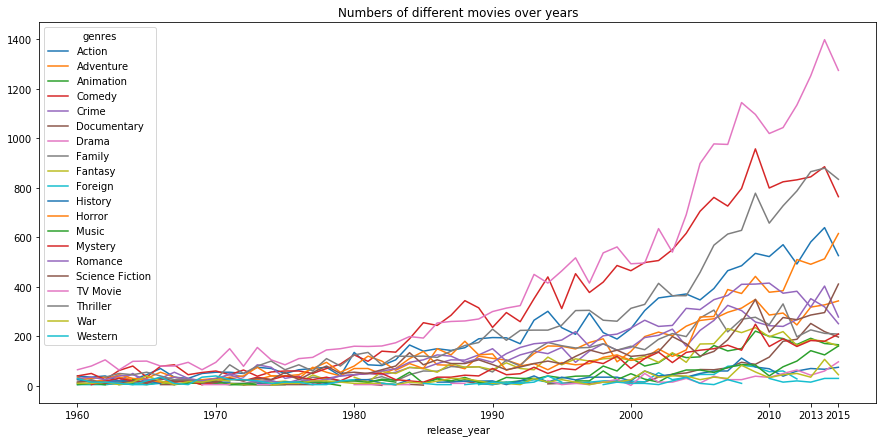

In [21]:
# visualization of different movies over years 
fig, ax = plt.subplots(figsize=(15,7))
mov_year.unstack().plot(ax=ax,kind='line', title = 'Numbers of different movies over years',
                        xticks = [1960,1970,1980,1990,2000,2010,2013,2015])

### Aslo  by visualization we can see that production of Drama movies increased over years with significant difference in numbers with other movies. 

### Research Question 3  (Did the rate of production of different types of movies increase over the years? )

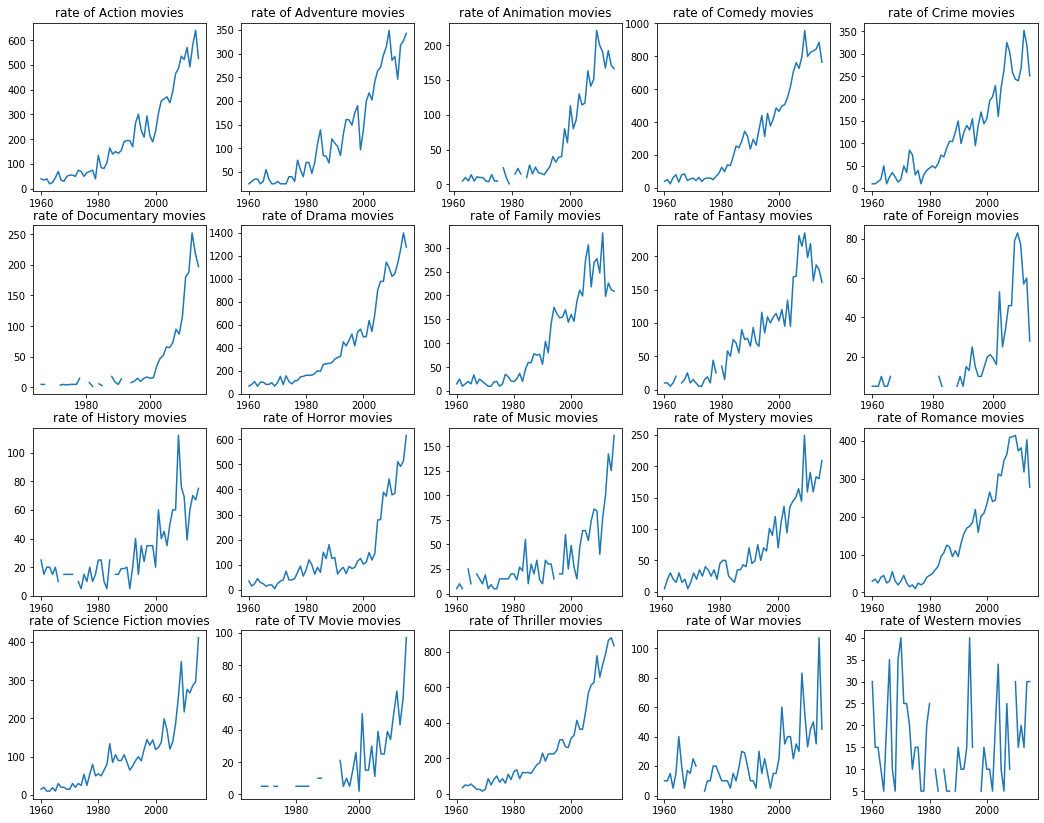

In [22]:
mov_year_uns = mov_year.unstack()
col = mov_year_uns.columns
fig = plt.figure(figsize=(18,18))
#sns.set(color_codes=True)
for i in range (1,21):
  fig.add_subplot(5, 5, i)
  plt.plot(mov_year_uns[col[i-1]])
  plt.title('rate of '+ str(col[i-1]+' movies') )
  
plt.show()

We can see that that not all movies in increasing rate over years such as Western movies which faced a significant fluctuation over years. However ,  in general , most of movies was increasing gradually. 

### Research Question 4  ( What kinds of properties are associated with movies that have high revenues? )

#### To answer this Question we can see the correlation between the revenue and other features  

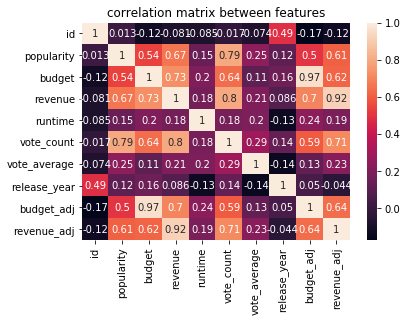

In [23]:
# calculate the correlation matrix 
corrMatrix = mod_df.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')
sns.heatmap(corrMatrix, annot=True )
plt.title('correlation matrix between features')
plt.show()

#### There are three features that high correlated with revenue , popularity , budget and vote_count

### Research Question 5  ( Which movies had high revenues over years? )

In [24]:
# calculate the sum of revenues associated with different kinds of movies 
rev_mov = mod_df.groupby(['id','genres'])['revenue'].sum().unstack()

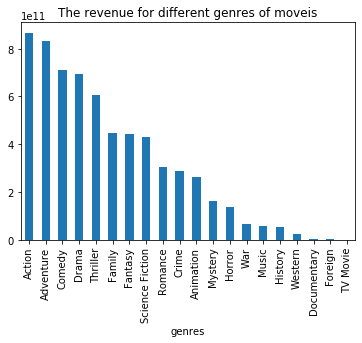

In [25]:
rev_mov.sum(axis=0).sort_values(ascending = False).plot(kind ='bar',title = 'The revenue for different genres of moveis')

### we can see that revenues of action movies on the top of incomes then Adventure , and Drama but did the same case for budget? 

### Research Question 6 ( Which movies had high budgets over years? )

In [26]:
# group movies with their id and take the budget for each type of movies in separate column
budg_mov = mod_df.groupby(['id','genres'])['budget'].mean().unstack()

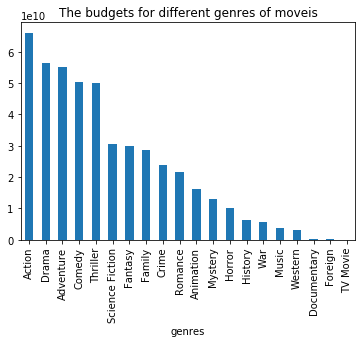

In [27]:
budg_mov.sum(axis=0).sort_values(ascending = False).plot(kind ='bar',title = 'The budgets for different genres of moveis')

### We can see that spending on action movies came on the top level and also they gave the highest revenue over years.
### while the Drama movies comes on the second level of spending budgets but its income is in the third level.  

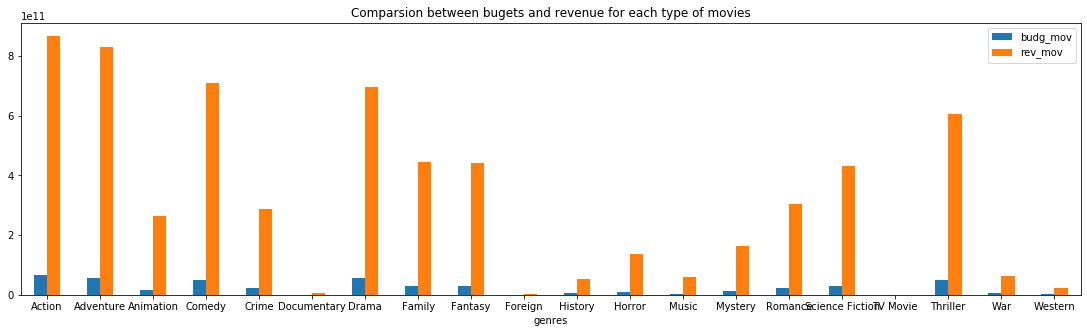

In [28]:
df_bug_rev_mov = { 'budg_mov' : budg_mov.sum(axis=0), 'rev_mov':rev_mov.sum(axis=0)}
df_bug_rev_mov = pd.DataFrame (df_bug_rev_mov)
ax = df_bug_rev_mov.plot.bar(rot=0,figsize=(19,5),title = 'Comparsion between bugets and revenue for each type of movies')

### Research Question 7 ( What were the budgets and revenue for movies in each year? )

In [29]:
rev_year =  mod_df.groupby(['id','release_year'])['revenue'].sum().unstack()

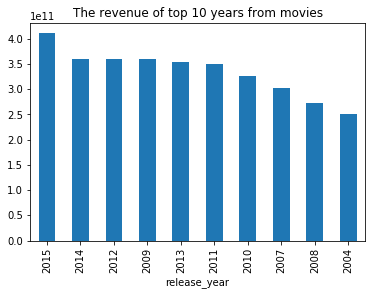

In [30]:
rev_year.sum(axis=0).sort_values(ascending = False )[0:10].plot(kind= 'bar',title = 'The revenue of top 10 years from movies' )

In [31]:
budg_year =  mod_df.groupby(['id','release_year'])['budget'].sum().unstack()

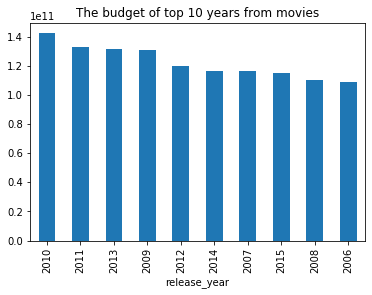

In [32]:
budg_year.sum(axis=0).sort_values(ascending = False )[0:10].plot(kind= 'bar',title = 'The budget of top 10 years from movies')

in 2010 , there are a lot of money was spent on movies but the its income was on the seventh rank among other years. 

### Research Question 8 ( What is the relation between the number of movies and revenue in each year?  )

In [33]:
# creat data frame to number of movies in each year and the revenu of movies in each year 
df = {'mo_year' : no_mov.sort_values(ascending = False), 'rev_year':rev_year.sum(axis=0).sort_values(ascending = False ) } 
df = pd.DataFrame(df)
df.head(4)

,mo_year,rev_year
release_year,,
1960,390,2.089575e+09
1961,375,6.008369e+09
1962,410,3.632048e+09
1963,451,2.760022e+09


correlation between the N.O of movies in each year and revenue 0.9875640897101009


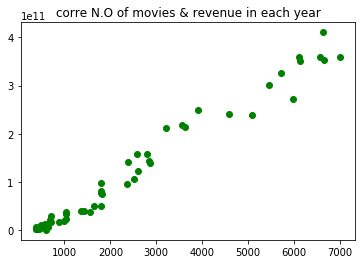

In [34]:
# scatter plot to number of movies in each year and the revenu of movies in each year
ax = plt.scatter(x=df.mo_year,y=df.rev_year, c='g')

plt.title('corre N.O of movies & revenue in each year')

print('correlation between the N.O of movies in each year and revenue ' +str(df.corr().iloc[1,0]))

#### There are high correlation between the number of movies and revenue in each year as increasing the number of movies will increase the profit in this year.

### Research Question 9 ( What is the relation between the budgets of movies and revenue in each year?  )

In [36]:
# creat dataframe to budgets and revenu in each year 
rev_budg_df = {'rev_year':rev_year.sum(axis=0).sort_values(ascending = False ), 'budg_year':budg_year.sum(axis=0).sort_values(ascending = False )}
rev_budg_df = pd.DataFrame(rev_budg_df)
rev_budg_df.head(4)

,rev_year,budg_year
release_year,,
1960,2.089575e+09,3.207042e+08
1961,6.008369e+09,5.876850e+08
1962,3.632048e+09,9.209732e+08
1963,2.760022e+09,1.186640e+09


corre between the budgets in each year and revenue 0.974498466408805


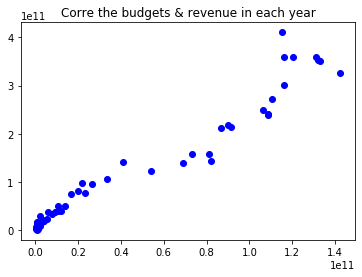

In [37]:
# relation between the budgets and revenue in each year 
ax = plt.scatter(x=rev_budg_df.budg_year,y=rev_budg_df.rev_year, c='b')
plt.title('Corre the budgets & revenue in each year')
print('corre between the budgets in each year and revenue ' +str(rev_budg_df.corr().iloc[1,0]))

#### We can see the high  linear correlation between budgets and revenue over years. 

<a id='conclusions'></a>
## Conclusions

> In this project , I noticed that there are highly linear correlation between budgets and revenue and also between the number of movies and revenue in each year . in 2014 , there were the highest number of movies and also the highest revenue in this year from movies.  Jurassic World film achieved the highest revenue over all movies in our dataset.  Chris Pratt took parts as actor in movies which got highest revenue totally over years while Colin Trevorrow directed the top movies in revenue.spending on action movies came on the top level and also they gave the highest revenue over years while the number of Drama movies are the highest over the last years.    

> **limitation**: There are missing values within important columns such as genres , cast and director and the data in those columns is string so we cannot replace it by mean or something so dropping these nan values affect on my analysis. Furthermore, there is no good description for columns. The data is not updated , it is only for movies from 1960 to 2015.